In [198]:
import pandas as pd
import json
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pygal

In [136]:
with open('countries_visits_2023_01.json','r') as f:
    data = json.load(f)

In [137]:
items = data['items']
print(len(items))

1


In [138]:
item = items[0]
item

print(item.keys())

dict_keys(['project', 'access', 'year', 'month', 'countries'])


In [139]:
project = item['project']

In [140]:
access = item['access']

In [141]:
year = item['year']

In [142]:
month = item['month']

In [143]:
countries = item['countries']

In [144]:
len(countries)

241

In [201]:
!pip install cairosvg

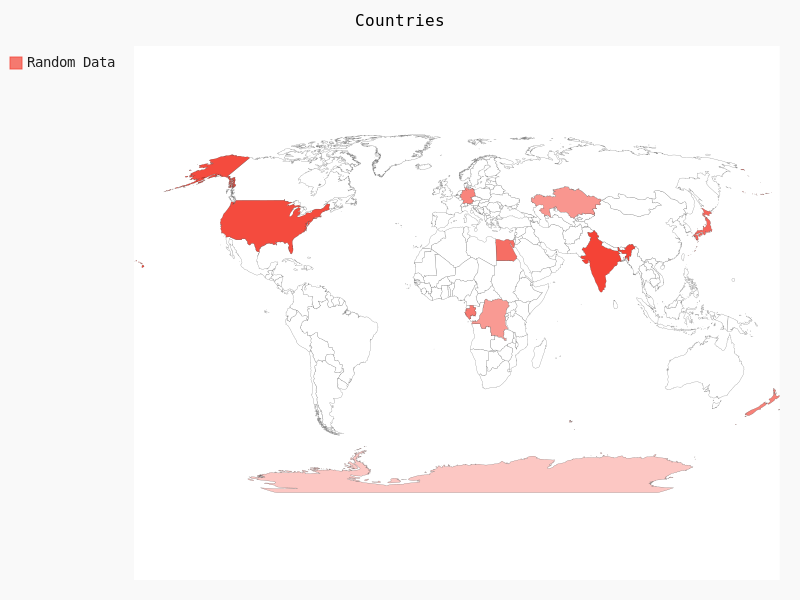

In [230]:
df = pd.DataFrame.from_dict(countries)
df.head(200)

,country,views,rank,views_ceil
0,US,1000000000-9999999999,1,3194571000
1,GB,100000000-999999999,2,883167000
2,IN,100000000-999999999,3,734491000
3,CA,100000000-999999999,4,386835000
4,AU,100000000-999999999,5,240218000
...,...,...,...,...
195,MP,100000-999999,196,111000
196,GA,100000-999999,197,111000
197,BI,100000-999999,198,109000
198,NE,100000-999999,199,101000


In [231]:
df.to_csv('countries.csv', index=False)

df

,country,views,rank,views_ceil
0,US,1000000000-9999999999,1,3194571000
1,GB,100000000-999999999,2,883167000
2,IN,100000000-999999999,3,734491000
3,CA,100000000-999999999,4,386835000
4,AU,100000000-999999999,5,240218000
...,...,...,...,...
236,CX,100-999,237,1000
237,NU,100-999,238,1000
238,TK,100-999,239,1000
239,KP,100-999,240,1000


In [208]:
df['views_min'] = df.apply(lambda row: int(row.views.split('-')[0]), axis = 1)
views_min =df.copy()

views_min.to_csv('countries_with_minimum_views.csv', index=False)

In [220]:
df.to_csv('countries_with_minimum_views.csv', index=False)


In [233]:
worldmap =  pygal.maps.world.World()
worldmap.title = 'Countries'
  
# adding the countries 
worldmap.add('Wikipedia views', {key.lower() : int(value) for key,value in zip(df['country'],df['views_ceil'])}) 

worldmap.render_to_file('wikipedia tendancies.svg') 
